In [1]:
import cv2
from utils.imutils import displayImage
import numpy as np

In [3]:
image_path = 'images/coins.png'

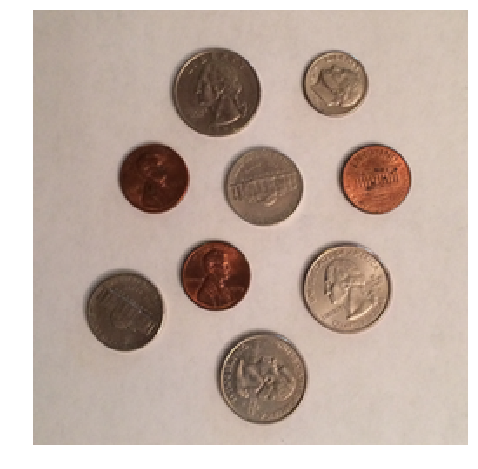

In [4]:
# load and blur the image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
displayImage(image)

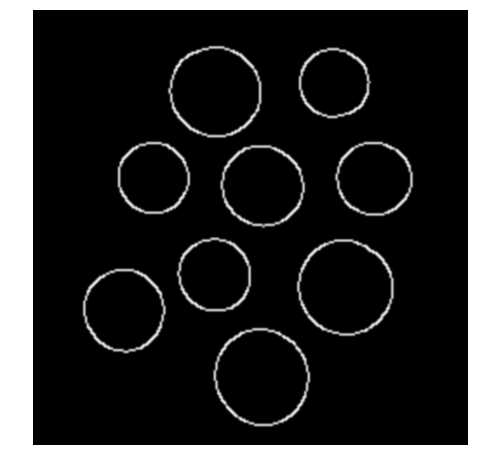

In [5]:
# apply Canny edge detection
edged = cv2.Canny(blurred, 30, 150)
displayImage(edged)

## Find Contours

In [6]:
# Find contours in the edged image.
# NOTE: The cv2.findContours method is DESTRUCTIVE to the image
# you pass in. If you intend on reusing your edged image, be
# sure to copy it before calling cv2.findContours

#RETR_EXTERNAL = means outside contours
#RETR_LIST = all contours

#CHAIN_APPROX_SIMPLE = save computation and memory through compression
#CHAIN_APPROX_NONE = get all POINTS in contour - usually unecessary
(_, cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# How many contours did we find?
print("I count {} coins in this image".format(len(cnts)))

I count 9 coins in this image


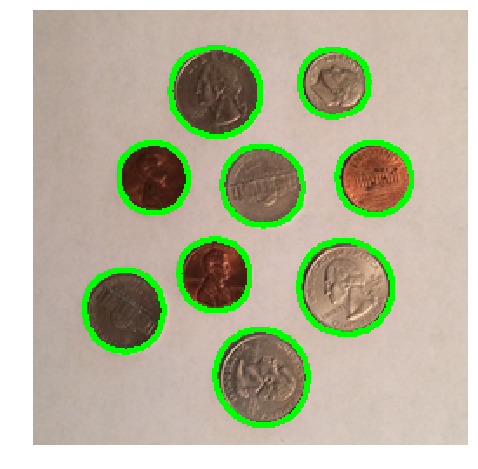

In [7]:
coins = image.copy()
# minus one (third parameter) means 'draw all'..it's an index value
cv2.drawContours(coins, cnts, -1, (0, 255, 0), 2)
displayImage(coins)

Coin #1


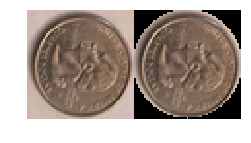

Coin #2


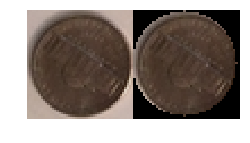

Coin #3


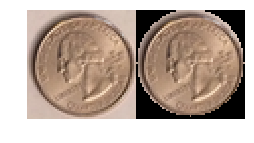

Coin #4


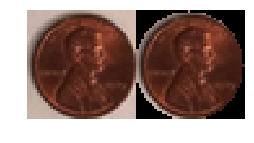

Coin #5


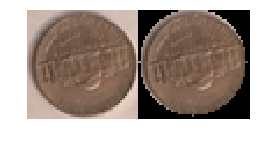

Coin #6


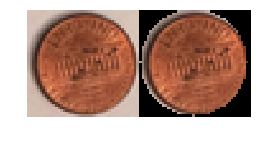

Coin #7


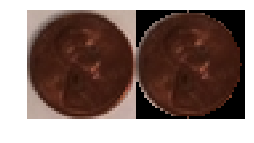

Coin #8


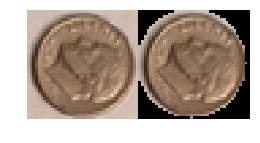

Coin #9


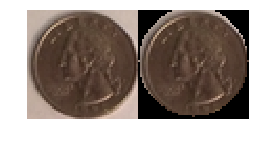

In [8]:
# Now, let's loop over each contour
for (i, c) in enumerate(cnts):
    # We can compute the 'bounding box' for each contour, which is
    # the rectangle that encloses the contour
    (x, y, w, h) = cv2.boundingRect(c)

    # Now that we have the contour, let's extract it using array
    # slices
    print("Coin #{}".format(i + 1))
    coin = image[y:y + h, x:x + w]
   
    # Just for fun, let's construct a mask for the coin by finding
    # The minumum enclosing circle of the contour
    mask = np.zeros(image.shape[:2], dtype = "uint8")
    ((centerX, centerY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(mask, (int(centerX), int(centerY)), int(radius), 255, -1)
    mask = mask[y:y + h, x:x + w]
    masked_coin = cv2.bitwise_and(coin, coin, mask = mask)
    
    displayImage(np.hstack([coin, masked_coin]), figSize=(4,2))